In [1]:
# Load dataset and import packages
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from library.sb_utils import save_file
data=pd.read_csv('../data/data_cleaned.csv')

In [2]:
data.head()

diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0          1        17.99         10.38          122.80     1001.0   
1          1        20.57         17.77          132.90     1326.0   
2          1        19.69         21.25          130.00     1203.0   
3          1        11.42         20.38           77.58      386.1   
4          1        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   symmetry_mean  ...  radius_worst  texture_worst  perimeter_worst  \
0         0.2419  ...         25.38          17.33           184.60   
1         0.1812  ...         24.99          23.41           158.80   
2         0.2069  ...         23.57          25.53           152.50   
3         0.2597  ...         14.91          26.50            98.87   
4         0.1809  ...         22.54          16.67           152.20   

   area_worst  smoothness_worst  compactness_worst  concavity_worst  \
0      2019.0            0.1622             0.6656           0.7119   
1      1956.0            0.1238             0.1866           0.2416   
2      1709.0            0.1444             0.4245           0.4504   
3       567.7            0.2098             0.8663           0.6869   
4      1575.0            0.1374             0.2050           0.4000   

   concave points_worst  symmetry_worst  fractal_dimension_worst  
0                0.2654          0.4601                  0.11890  
1                0.1860          0.2750                  0.08902  
2                0.2430          0.3613                  0.08758  
3                0.2575          0.6638                  0.17300  
4                0.1625          0.2364                  0.07678  

[5 rows x 31 columns]

In [3]:
data.shape

(569, 31)

## Modify name for better visualization

In [4]:

#extract the original name
original_name=data.columns
original_name=original_name.tolist()

# add number to each name for easier visualization
new_name=[]
i=0
for name in original_name:
    new=name+ '_' + str(i)
    str(i) + "-" + name
    new_name.append(new)
    i+=1

#repalce feature name
data.columns=new_name
data.columns

Index(['diagnosis_0', 'radius_mean_1', 'texture_mean_2', 'perimeter_mean_3',
       'area_mean_4', 'smoothness_mean_5', 'compactness_mean_6',
       'concavity_mean_7', 'concave points_mean_8', 'symmetry_mean_9',
       'fractal_dimension_mean_10', 'radius_se_11', 'texture_se_12',
       'perimeter_se_13', 'area_se_14', 'smoothness_se_15',
       'compactness_se_16', 'concavity_se_17', 'concave points_se_18',
       'symmetry_se_19', 'fractal_dimension_se_20', 'radius_worst_21',
       'texture_worst_22', 'perimeter_worst_23', 'area_worst_24',
       'smoothness_worst_25', 'compactness_worst_26', 'concavity_worst_27',
       'concave points_worst_28', 'symmetry_worst_29',
       'fractal_dimension_worst_30'],
      dtype='object')

## Model 1 - Logistic Regression

In [5]:
#import packages
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,classification_report

In [6]:
y=data['diagnosis_0']
X = data.drop(['diagnosis_0'],axis=1)
# create test set and training set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.8, random_state=42)

In [7]:

# create classifier
logreg=LogisticRegression()

logreg.fit(X_train, y_train)

y_pred=logreg.predict(X_test)

/Users/yunpang/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [8]:
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[275  15]
 [ 12 154]]
              precision    recall  f1-score   support

           0       0.96      0.95      0.95       290
           1       0.91      0.93      0.92       166

    accuracy                           0.94       456
   macro avg       0.93      0.94      0.94       456
weighted avg       0.94      0.94      0.94       456



<AxesSubplot:>

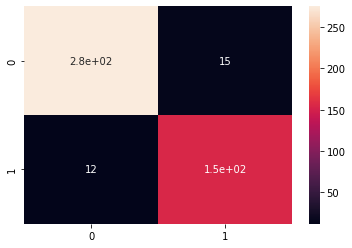

In [9]:
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True)

## Model 2 - SVM

In [10]:
#load package
from sklearn.svm import SVC
svc_model = SVC()

In [11]:
#train and fit data
svc_model.fit(X_train, y_train)
y_pred = svc_model.predict(X_test)

In [12]:
#metric
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[285   5]
 [ 28 138]]
              precision    recall  f1-score   support

           0       0.91      0.98      0.95       290
           1       0.97      0.83      0.89       166

    accuracy                           0.93       456
   macro avg       0.94      0.91      0.92       456
weighted avg       0.93      0.93      0.93       456



<AxesSubplot:>

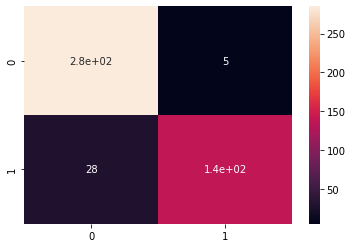

In [13]:
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True)

The SVM predicted 28 cases of cancer as healthy. 

## model 3 - Decision tree

In [15]:
# Import necessary modules
from scipy.stats import randint
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import RandomizedSearchCV

In [16]:
# Setup the parameters and distributions to sample from: param_dist
param_dist = {"max_depth": [3, None],
             "max_features": randint(1, 9),
             "min_samples_leaf": randint(1, 9),
             "criterion": ["gini", "entropy"]}

In [21]:
# Instantiate a Decision Tree classifier: tree
tree = DecisionTreeClassifier()
 
# Instantiate the RandomizedSearchCV object: tree_cv
tree_cv = RandomizedSearchCV(tree, param_dist, cv=5)

# Fit it to the data
tree_cv.fit(X_test, y_test)

#y_pred = svc_model.predict(X_test)

RandomizedSearchCV(cv=5, estimator=DecisionTreeClassifier(),
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': [3, None],
                                        'max_features': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7fc97b5b60d0>,
                                        'min_samples_leaf': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7fc9683e3190>})

In [23]:
# Print the tuned parameters and score
print("Tuned Decision Tree Parameters: {}".format(tree_cv.best_params_))
print("Best score is {}".format(tree_cv.best_score_))

Tuned Decision Tree Parameters: {'criterion': 'gini', 'max_depth': 3, 'max_features': 6, 'min_samples_leaf': 8}
Best score is 0.936359292881032


In [25]:
tree = DecisionTreeClassifier(criterion ='gini', random_state = 42, max_depth = 3, max_features = 6, min_samples_leaf=8 )

# Do the fit, predict, and series transformations as before. 
tree.fit(X_train, y_train)
y_pred=tree.predict(X_test)

In [33]:
#metric
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[286   4]
 [ 36 130]]
              precision    recall  f1-score   support

           0       0.89      0.99      0.93       290
           1       0.97      0.78      0.87       166

    accuracy                           0.91       456
   macro avg       0.93      0.88      0.90       456
weighted avg       0.92      0.91      0.91       456



<AxesSubplot:>

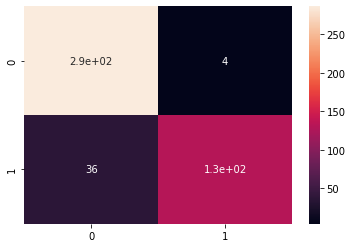

In [34]:
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True)